<a href="https://colab.research.google.com/github/Marcusreu1/DataScienceToolkit/blob/main/Escalamiento%2C_Normalizaci%C3%B3n_y_Estandarizaci%C3%B3n_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt


df= pd.read_csv("datos_personas.csv")

In [4]:
df.head()

,ingreso,carros
0,22273.577534,3
1,8961.047249,1
2,7437.977263,2
3,12064.915290,2
4,9296.396167,1


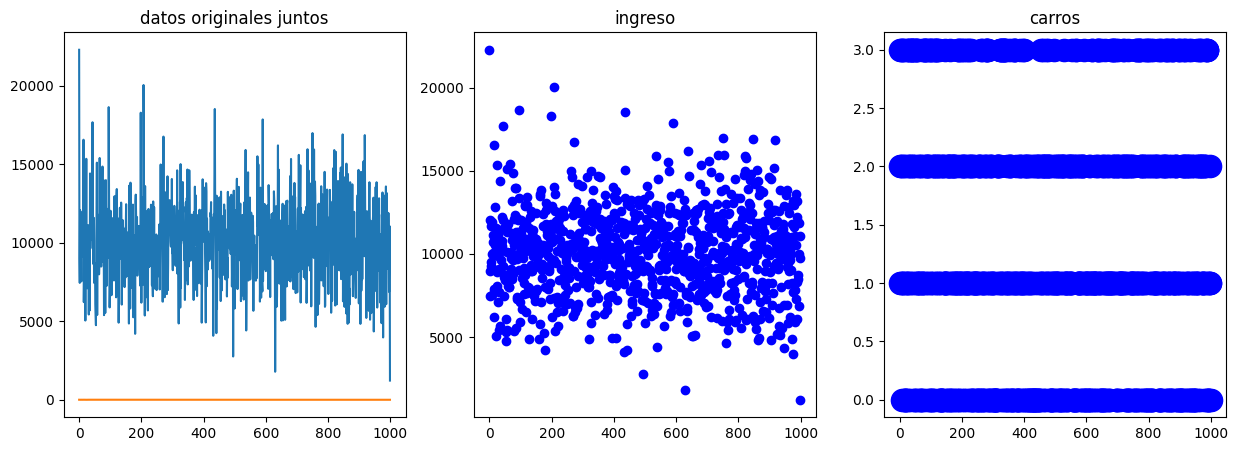

In [5]:
#graficar datos a escala original
fig= plt.figure(figsize=(15,5))
ax_1=fig.add_subplot(1,3,1)
ax_2=fig.add_subplot(1,3,2)
ax_3= fig.add_subplot(1,3,3)

ax_1.set_title("datos originales juntos")
ax_1.plot(df)
ax_2.set_title("ingreso")
ax_2.plot(df["ingreso"], linewidth= 0, marker= "o", color= "blue", markersize= 6)
ax_3.set_title("carros")
ax_3.plot(df["carros"],linewidth= 0, marker= "o", color= "blue", markersize= 16)

#distribucion de los datos original

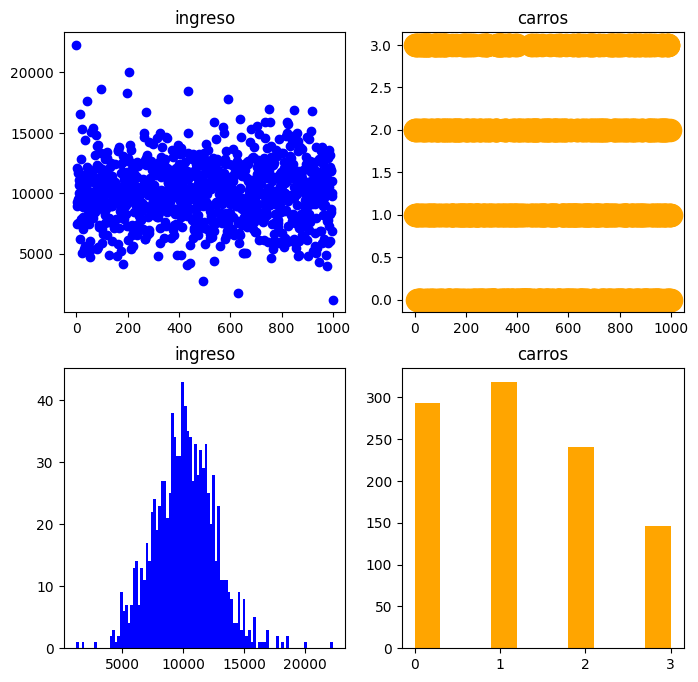

In [6]:
fig= plt.figure(figsize=(8,8))
ax_1=fig.add_subplot(2,2,1)
ax_2=fig.add_subplot(2,2,2)
ax_3= fig.add_subplot(2,2,3)
ax_4= fig.add_subplot(2,2,4)

ax_1.set_title("ingreso")
ax_1.plot(df["ingreso"], linewidth= 0, marker= "o", color= "blue", markersize= 6)
ax_2.set_title("carros")
ax_2.plot(df["carros"],linewidth= 0, marker= "o", color= "orange", markersize= 16)
ax_3.set_title("ingreso")
ax_3.hist(df["ingreso"],bins=100, color= "blue")
ax_4.set_title("carros")
ax_4.hist(df["carros"], color= "orange")
plt.show()

#escala en funcion del minimo y el maximo

In [7]:
#escala en funcion del minimo y el maximo
datos_min_max= preprocessing.MinMaxScaler().fit_transform(df)
datos_min_max


array([[1.        , 1.        ],
       [0.36761553, 0.33333333],
       [0.29526521, 0.66666667],
       ...,
       [0.40545125, 0.33333333],
       [0.46656343, 0.33333333],
       [0.        , 0.        ]])

In [8]:
datos_normalizados=preprocessing.Normalizer().transform(df.T)
datos_normalizados= datos_normalizados.T
datos_normalizados

array([[0.06777903, 0.05886881],
       [0.02726868, 0.01962294],
       [0.02263394, 0.03924588],
       ...,
       [0.02969242, 0.01962294],
       [0.03360725, 0.01962294],
       [0.00371935, 0.        ]])

#estandarizacion

In [9]:
datos_standard_scalar=preprocessing.StandardScaler().fit_transform(df)

datos_robust_scaler=preprocessing.RobustScaler().fit_transform(df)

datos_standard_scalar, datos_robust_scaler

(array([[ 4.81555174,  1.70892042],
        [-0.4413019 , -0.23193185],
        [-1.04273197,  0.73849429],
        ...,
        [-0.12678303, -0.23193185],
        [ 0.38122719, -0.23193185],
        [-3.49719763, -1.20235798]]),
 array([[ 3.70548334,  1.        ],
        [-0.3376601 ,  0.        ],
        [-0.80023109,  0.5       ],
        ...,
        [-0.09575781,  0.        ],
        [ 0.29496225,  0.        ],
        [-2.68800607, -0.5       ]]))

#comparacion de metodos

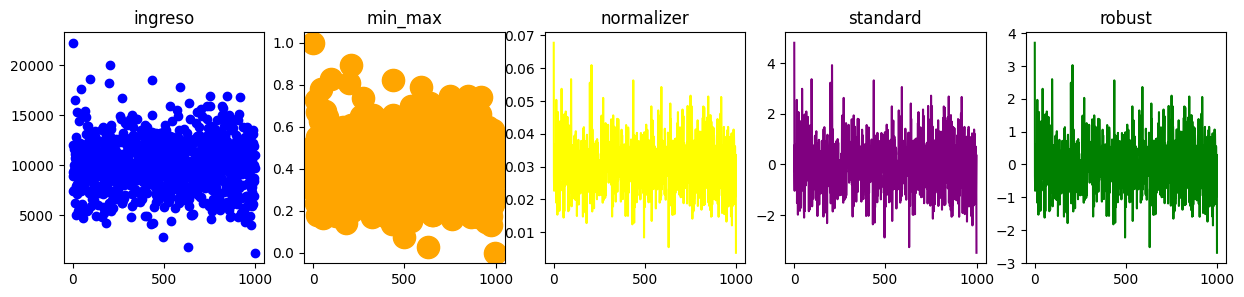

In [12]:
datos_min_max=pd.DataFrame(datos_min_max, columns=["ingreso", "carros"])
datos_normalizados=pd.DataFrame(datos_normalizados, columns=["ingreso", "carros"])
datos_standard_scalar=pd.DataFrame(datos_standard_scalar, columns=["ingreso", "carros"])
datos_robust_scaler=pd.DataFrame(datos_robust_scaler, columns=["ingreso", "carros"])

fig= plt.figure(figsize=(15,3))
ax_1=fig.add_subplot(1,5,1)
ax_2=fig.add_subplot(1,5,2)
ax_3=fig.add_subplot(1,5,3)
ax_4=fig.add_subplot(1,5,4)
ax_5=fig.add_subplot(1,5,5)

ax_1.set_title("ingreso")
ax_1.plot(df["ingreso"], linewidth= 0, marker= "o", color= "blue", markersize= 6)
ax_2.set_title("min_max")
ax_2.plot(datos_min_max["ingreso"],linewidth= 0, marker= "o", color= "orange", markersize= 16)
ax_3.set_title("normalizer")
ax_3.plot(datos_normalizados["ingreso"], color= "yellow")
ax_4.set_title("standard")
ax_4.plot(datos_standard_scalar["ingreso"], color= "purple")
ax_5.set_title("robust")
ax_5.plot(datos_robust_scaler["ingreso"], color= "green")
plt.show()